In [4]:
"""
First, import the required Python dependencies.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt # module for plotting 
% matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

'\nFirst, import the required Python dependencies.\n'

In [5]:
# Pandas Dataframe
df = pd.read_csv('flight_data_cleaned.csv')

In [6]:
# Find variable thats needs to be taken care(either drop or fill). 
df.count()


Unnamed: 0        336776
year              336776
month             336776
day               336776
dep_time          336776
sched_dep_time    336776
dep_delay         336776
arr_time          336776
sched_arr_time    336776
arr_delay         336776
carrier           336776
flight            336776
tailnum           334264
origin            336776
dest              336776
air_time          336776
distance          336776
hour              336776
minute            336776
time_hour         336776
dtype: int64

In [7]:
df = df[df["dep_delay"]]
df.loc[:, ["dep_delay"] ].describe()

,dep_delay
count,336776.000000
mean,12.726444
std,39.738848
min,-43.000000
25%,-5.000000
50%,-1.000000
75%,12.000000
max,1301.000000


In [13]:
# Descriptive statistics by group
# dep_delay & flight groupby origin(airports)
grp_dep = df[['dep_delay']].groupby(df['origin']).describe()
grp_dep



dep_delay                                                    
           count       mean        std   min  25%  50%   75%     max
origin                                                              
EWR     120835.0  15.221308  40.789520 -25.0 -4.0  0.0  17.0  1126.0
JFK     111279.0  12.177244  38.722719 -43.0 -4.0 -1.0  11.0  1301.0
LGA     104662.0  10.429979  39.414590 -33.0 -6.0 -3.0   8.0   911.0

(array([  1.10466247e-06,   0.00000000e+00,   0.00000000e+00,
          1.10466247e-06,   2.20932495e-06,   1.10466247e-06,
          3.31398742e-06,   2.31979120e-05,   7.51170483e-05,
          2.10990533e-04,   1.17977952e-03,   5.76854744e-03,
          1.52067836e-02,   5.43979989e-02,   8.13705425e-02,
          6.27923290e-02,   1.60507458e-02,   1.68195908e-02,
          1.27124558e-02,   7.65862494e-03,   9.33992122e-03,
          7.91711595e-03,   4.79313048e-03,   6.52303191e-03,
          5.43935802e-03,   4.32364893e-03,   4.63516374e-03,
          3.73375916e-03,   2.22368556e-03,   2.91299495e-03,
          2.76717950e-03,   2.57165424e-03,   1.60176059e-03,
          2.15961514e-03,   2.07897478e-03,   1.22948933e-03,
          1.83594903e-03,   1.77077395e-03,   1.06047598e-03,
          1.53989949e-03,   1.40513067e-03,   9.17974516e-04,
          1.29355976e-03,   1.22065203e-03,   7.02565334e-04,
          1.09472051e-03,   1.01628948e-03,   9.73207640e-04,
        

(-50, 300)

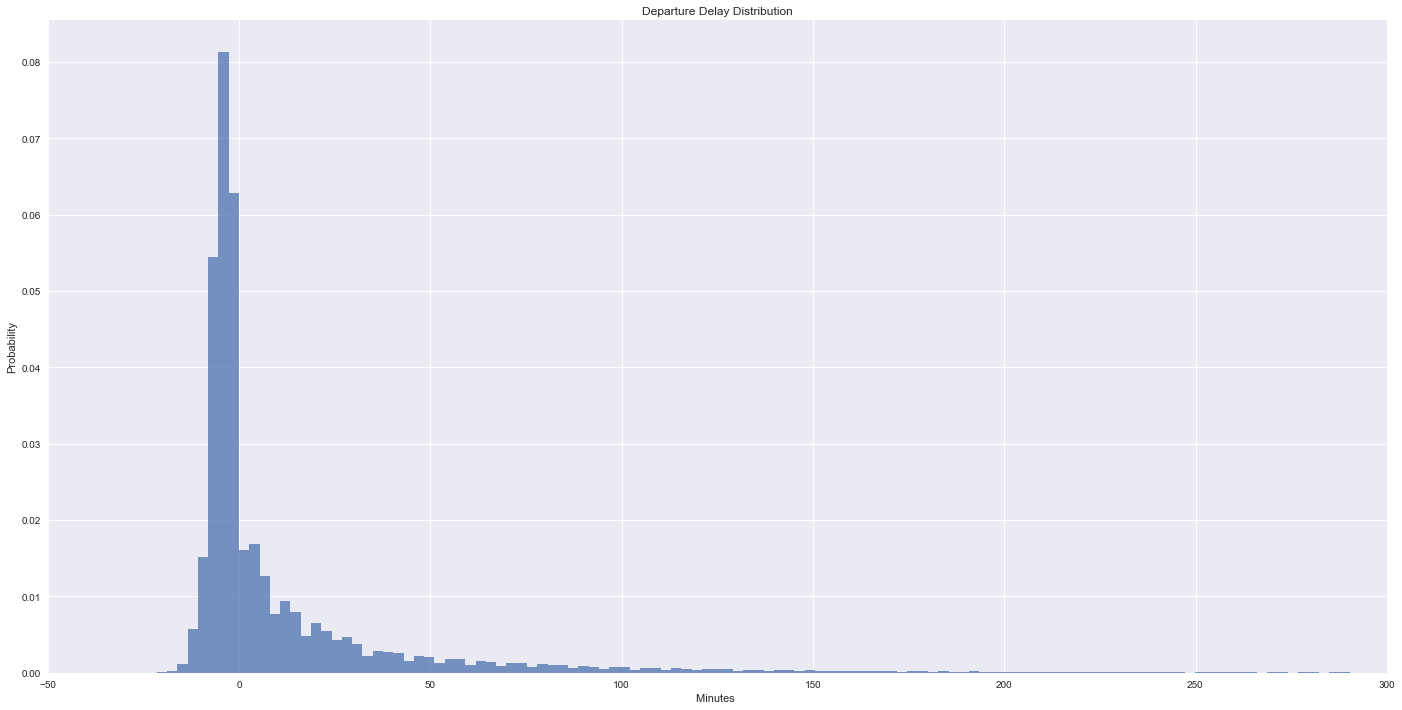

In [14]:
# plt departure delay distribution
plt.figure(figsize=(24, 12))
plt.hist(df.dep_delay, bins = 500, normed=1, alpha=0.75)
plt.xlim(-50,300)
plt.xlabel('Minutes ')
plt.ylabel('Probability')
plt.title('Departure Delay Distribution')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

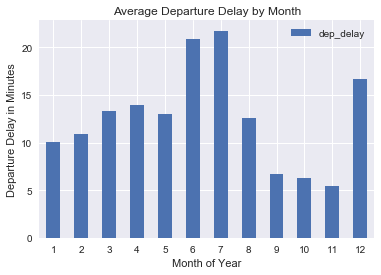

In [11]:
#departure delay w.r.t month
plt.figure(figsize=(12, 6))
df[['month','dep_delay']].groupby('month').mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Month of Year')
plt.ylabel('Departure Delay in Minutes')
plt.title('Average Departure Delay by Month')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

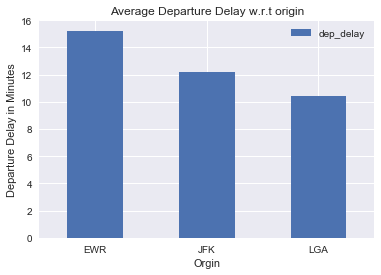

In [12]:
#departure delay w.r.t origin
plt.figure(figsize=(12, 6))
df[['origin','dep_delay']].groupby('origin').mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Orgin')
plt.ylabel('Departure Delay in Minutes')
plt.title('Average Departure Delay w.r.t origin')